In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D:\\Nikhil\\BANA\\Learning\\Projects\\Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [41]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [52]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [65]:
from sklearn.grid_search import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':[0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv = 20, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

In [66]:
best_accuracy = grid_search.best_score_
best_parametrs = grid_search.best_params_

best_parametrs

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
best_accuracy

0.9066666666666666

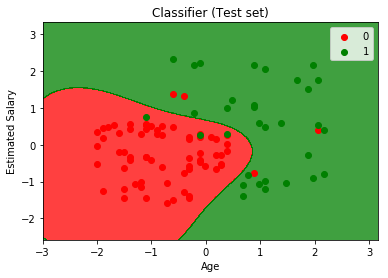

In [68]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()